# Swim stroke analysis
As I'm trying to improve my swimming capabilities I wanted to know how good my swim pace was compared to my strokes I make to get to the other side of the pool. I exported all my apple health data, and used this script to turn the large XML into many CSVs: https://github.com/markwk/qs_ledger/blob/master/apple_health/apple-health-data-parser.py. 

I then plot my performance on this stroke rate chart: http://previous.swimsmooth.com/slowsr_adv.html. 

Enjoy!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

swim_stroke = pd.read_csv('SwimmingStrokeCount.csv')
swim_distance = pd.read_csv('DistanceSwimming.csv')
merged = pd.merge(swim_distance, swim_stroke, on='startDate')    

In [2]:
# Verify all items have the same stroke rate
stroke_hist = list()
distance_hist = list()
stroke_meter_hist = list()
pace_time_per_100m = list()

for index, row in merged.iterrows():
    assert row['endDate_x'] == row['endDate_y']
    seconds_passed = pd.to_datetime(row['endDate_x']) - pd.to_datetime(row['startDate'])
    seconds_passed = seconds_passed.total_seconds()
    
    distance = row['value_x']
    strokes = row['value_y']

    distance_per_second = distance / seconds_passed
    strokes_per_second = strokes / seconds_passed 
    strokes_per_meter = strokes / distance
    
    # Filter out rediculously slow measurements... We want to make already reasonably paced swims faster!
    if distance_per_second > 2 or strokes_per_second > 0.7 or strokes_per_meter > 1.0: 
        continue
    
    distance_hist.append(distance_per_second)
    stroke_hist.append(strokes_per_second * 60*2) # *2 to get both arms
    stroke_meter_hist.append(strokes_per_meter)
    pace_time_per_100m.append((seconds_passed / distance)*100) # to get to 100 meters
    

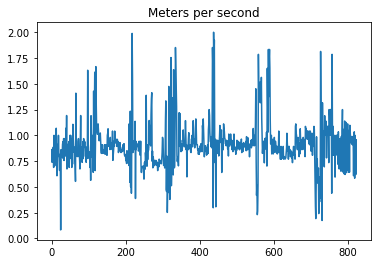

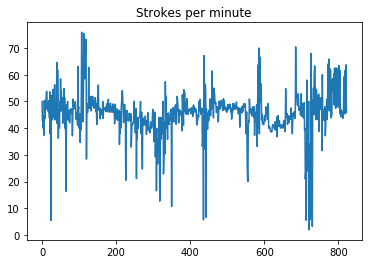

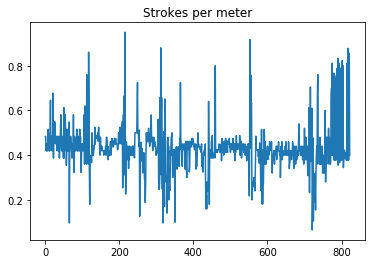

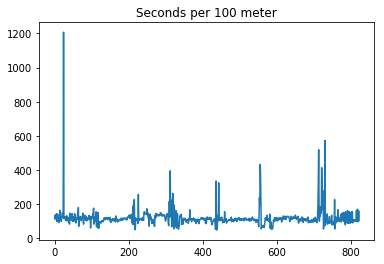

In [3]:
# Plot the raw data measurements to get a feeling for how much faster you became over time

plt.plot(distance_hist)
plt.title("Meters per second")
plt.show()

plt.plot(stroke_hist)
plt.title("Strokes per minute")
plt.show()

plt.plot(stroke_meter_hist)
plt.title("Strokes per meter")
plt.show()


plt.plot(pace_time_per_100m)
plt.title("Seconds per 100 meter")
plt.show()

Text(0,0.5,'Stroker per minute')

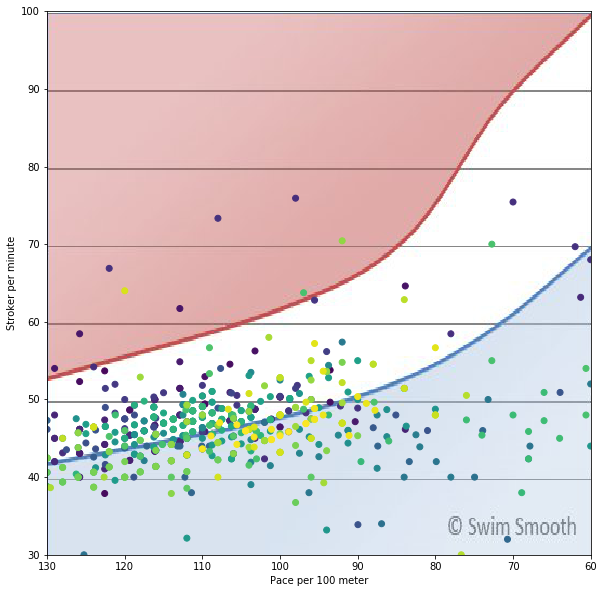

In [4]:
# Now plot the pace and strokes per minute on the swim-smooth stroke rate chart (http://previous.swimsmooth.com/slowsr_adv.html)

plt.figure(figsize=(10,10))
im = plt.imread('stroke_rate_chart.jpeg')[50:400, 22:525]
plt.imshow(im, extent=[130,60,30,100])
plt.scatter(pace_time_per_100m, stroke_hist, c=[x for x in range(len(stroke_hist))])

# Can be useful to comment or uncomment these lines if you are specifically interested 
# in your last few or first few swims of your swimming career
#plt.scatter(pace_time_per_100m[-100:], stroke_hist[-100:])
#plt.scatter(pace_time_per_100m[:100], stroke_hist[:100])
plt.axis([130, 60, 30, 100])
plt.xlabel("Pace per 100 meter")
plt.ylabel("Stroker per minute")